In [134]:
import numpy as np
import pandas as pd
import os, time
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau

*Importing of dataset*

In [136]:
#from tf.keras.datasets import mnist

(X_train, y_train), (X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()


In [137]:
# Read csv data files
train_data = pd.read_csv('C:/archive/fashion-mnist_train.csv')
test_data = pd.read_csv('C:/archive/fashion-mnist_test.csv')
X_train.shape , y_train.shape
X_test.shape , y_test.shape
print("X_train : ", X_train.shape, "y_train : ", y_train.shape)
print("X_test : ", X_test.shape, "y_test : ", y_test.shape)

X_train :  (60000, 28, 28) y_train :  (60000,)
X_test :  (10000, 28, 28) y_test :  (10000,)


In [138]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [140]:
y_train[0]

9

In [141]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

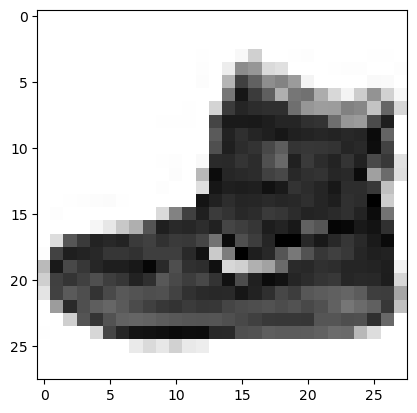

In [142]:
plt.imshow(X_train[0],cmap = 'Greys')



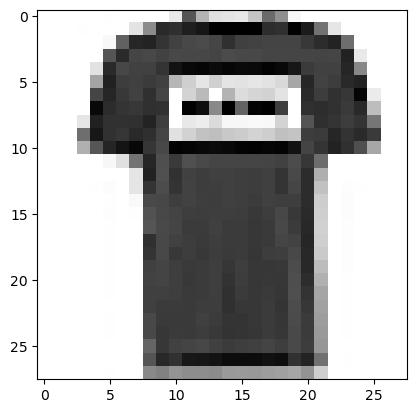

In [143]:
plt.imshow(X_train[1],cmap = 'Greys')


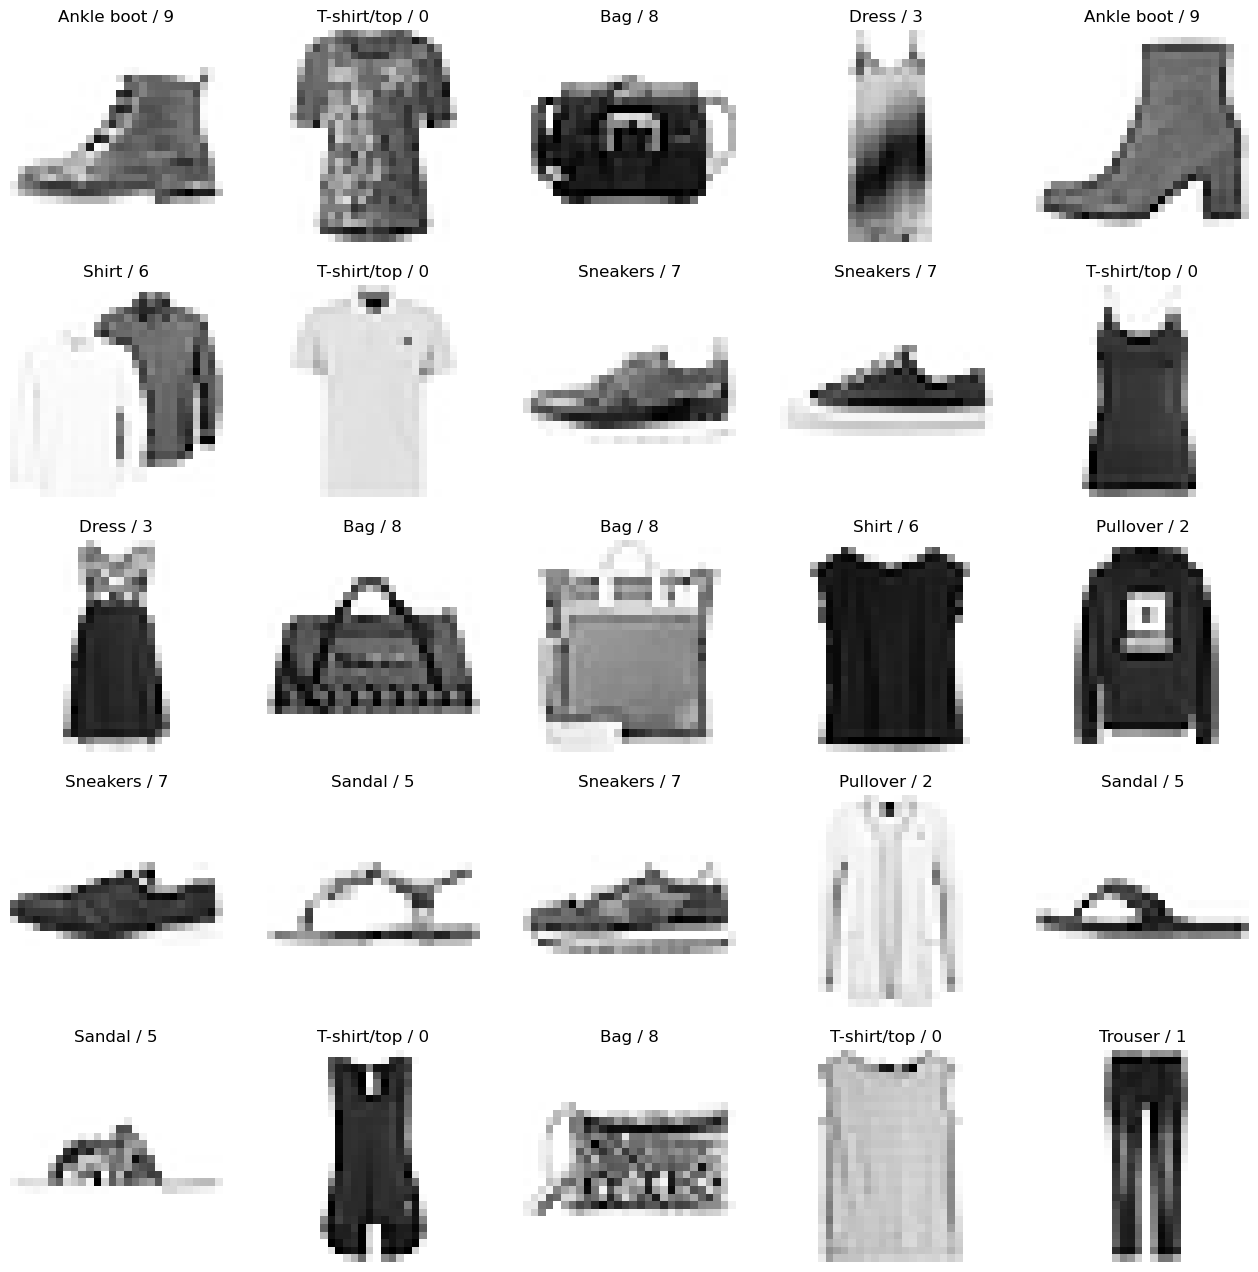

In [144]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap = 'Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

### change shape to 4 dim

In [145]:
X_train.ndim 


3

In [146]:
X_train.shape

(60000, 28, 28)

In [147]:
X_train  = np.expand_dims(X_train,-1)
X_test  = np.expand_dims(X_test,-1)

In [148]:
X_train.ndim 

4

In [149]:
X_train.shape


(60000, 28, 28, 1)

### scaling the data features to 0:1 ratio

In [150]:
X_train = X_train/255
X_test = X_test/255
X_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078431],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.18823529],
        [0.16862745],
        [0.34117647],
        [0.65882353],
        [0.52156863],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215686],
        [0.53333333],
        [0.85882353],
        [0.84705882],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

### validating the data 

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train , test_size = 0.2 , random_state = 2020)


In [152]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [153]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

### Adding convolution neural network layers 

In [154]:
model = keras.models.Sequential([
        keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (1,1), padding = 'valid', 
                            activation = 'relu', input_shape = [28,28,1]), # first layer of the CNN 
        keras.layers.MaxPooling2D(pool_size = (2,2))
])

In [155]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = 3, strides = (1,1), padding = 'valid', 
                    activation = 'relu', input_shape = [28,28,1]))# 1st layer of the CNN 
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',
                 activation = 'relu',input_shape = [28,28,1])) # 2nd Layer 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',
                 activation = 'relu',input_shape = [28,28,1])) # 3rd Layer
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

#adding normal neural network layers that works on the image after all the filter and feature extraction work done above 

model.add(Dense(units = 128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units = 10,activation = 'softmax'))



### overview of the network

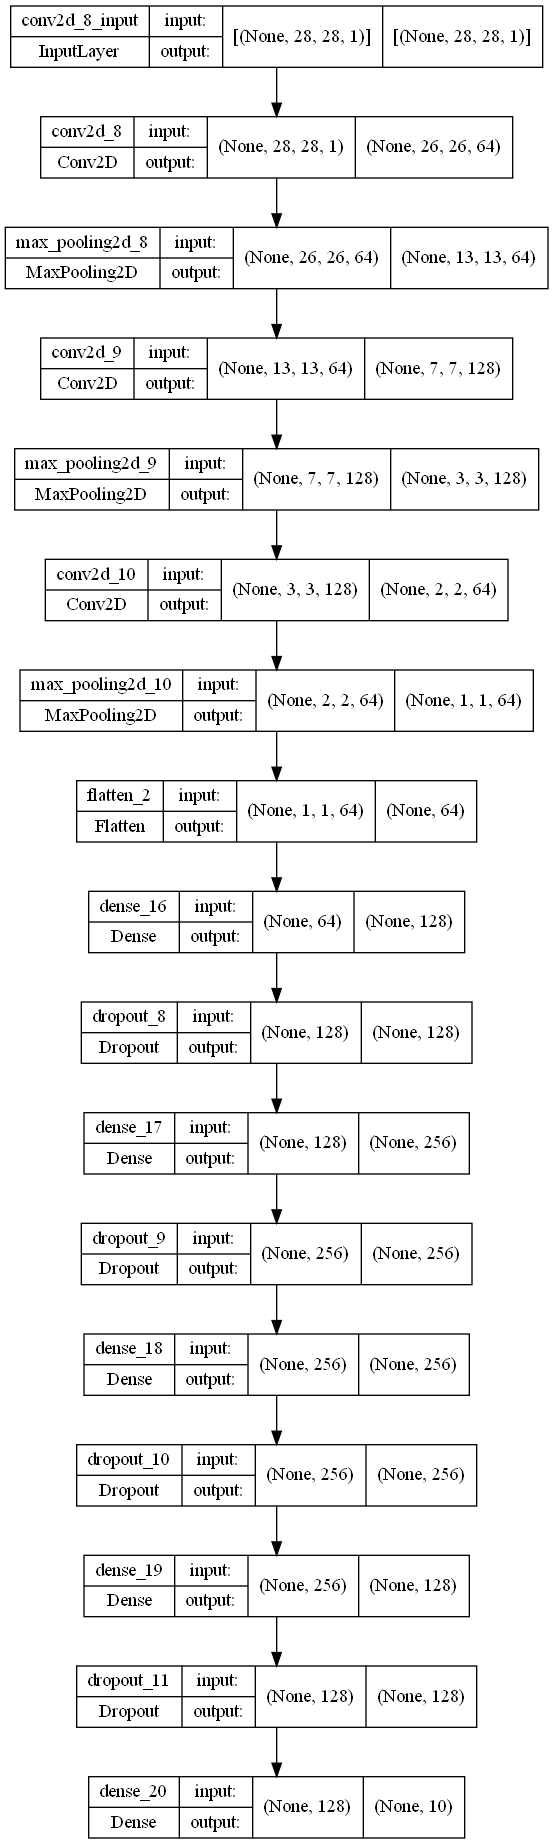

In [156]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [157]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 64)        

### compiling the model

In [158]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


### fitting the model 

In [159]:
# Incorporating reduced learning and early stopping for callback in order to save the best parameters and prevent overitting when the model isn't improving 
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [160]:
#model.fit(X_train, y_train, epochs = 20, batch_size = 512, verbose = 1, validation_data = (X_val, y_val))
#model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs = 20,batch_size = 512,verbose = 1,)


Epoch 1/20
94/94 [==============================] - 19s 187ms/step - loss: 1.1901 - accuracy: 0.5321 - val_loss: 0.6011 - val_accuracy: 0.7673
Epoch 2/20
94/94 [==============================] - 18s 196ms/step - loss: 0.5941 - accuracy: 0.7754 - val_loss: 0.4868 - val_accuracy: 0.8180
Epoch 3/20
94/94 [==============================] - 20s 212ms/step - loss: 0.4918 - accuracy: 0.8161 - val_loss: 0.4345 - val_accuracy: 0.8401
Epoch 4/20
94/94 [==============================] - 18s 194ms/step - loss: 0.4172 - accuracy: 0.8480 - val_loss: 0.4055 - val_accuracy: 0.8463
Epoch 5/20
94/94 [==============================] - 18s 195ms/step - loss: 0.3708 - accuracy: 0.8681 - val_loss: 0.3812 - val_accuracy: 0.8548
Epoch 6/20
94/94 [==============================] - 18s 192ms/step - loss: 0.3390 - accuracy: 0.8794 - val_loss: 0.3276 - val_accuracy: 0.8806
Epoch 7/20
94/94 [==============================] - 17s 177ms/step - loss: 0.3104 - accuracy: 0.8905 - val_loss: 0.3251 - val_accuracy: 0.8810

In [213]:
# improved stats with a history function to save stats
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.3485 - accuracy: 0.8792 - val_loss: 0.3264 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2817 - accuracy: 0.9008 - val_loss: 0.3387 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2605 - accuracy: 0.9082 - val_loss: 0.2991 - val_accuracy: 0.8981 - lr: 0.0010
Epoch 4/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2413 - accuracy: 0.9143 - val_loss: 0.3065 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 5/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9190
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2300 - accuracy: 0.9191 - val_loss: 0.3024 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 6/20
1500/1500 [===================

In [214]:

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [215]:
# saving the stats of my model
macc = history.history['accuracy']
mval_acc = history.history['val_accuracy']
mloss = history.history['loss']
mval_loss = history.history['val_loss']


In [216]:
# taking the final stats of the model and saving them
my_val_acc = mval_acc[len(mval_acc)-1] * 100
my_acc = macc[len(macc)-1] * 100
my_val_loss = mval_loss[len(mval_loss)-1] * 100
my_loss = mloss[len(mloss)-1] * 100


### testing the model 

In [218]:
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2) # change from 3 dim to 4 dim


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [219]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)) ##


9

In [220]:
y_test[0]


9

In [221]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### model evaluation 

In [222]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3422 - accuracy: 0.9130


[0.3421858847141266, 0.9129999876022339]

### confusion matrix

<AxesSubplot:>

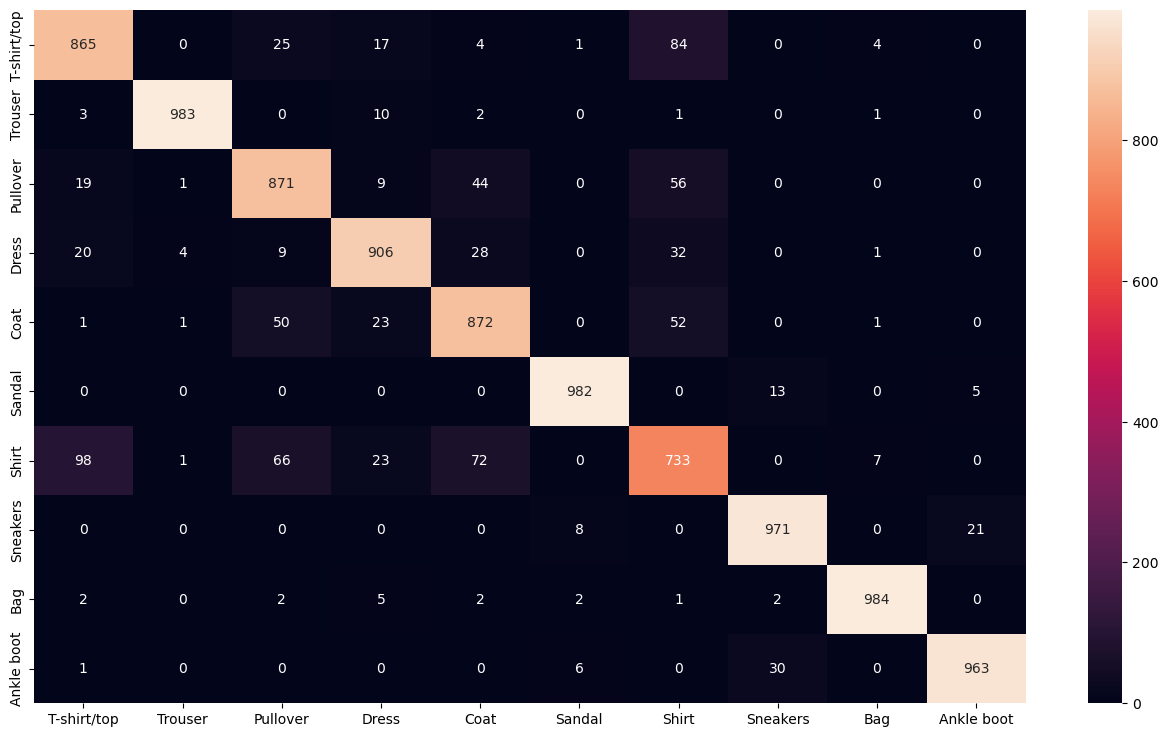

In [223]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)

### visualization of the prediction againts the actual values 

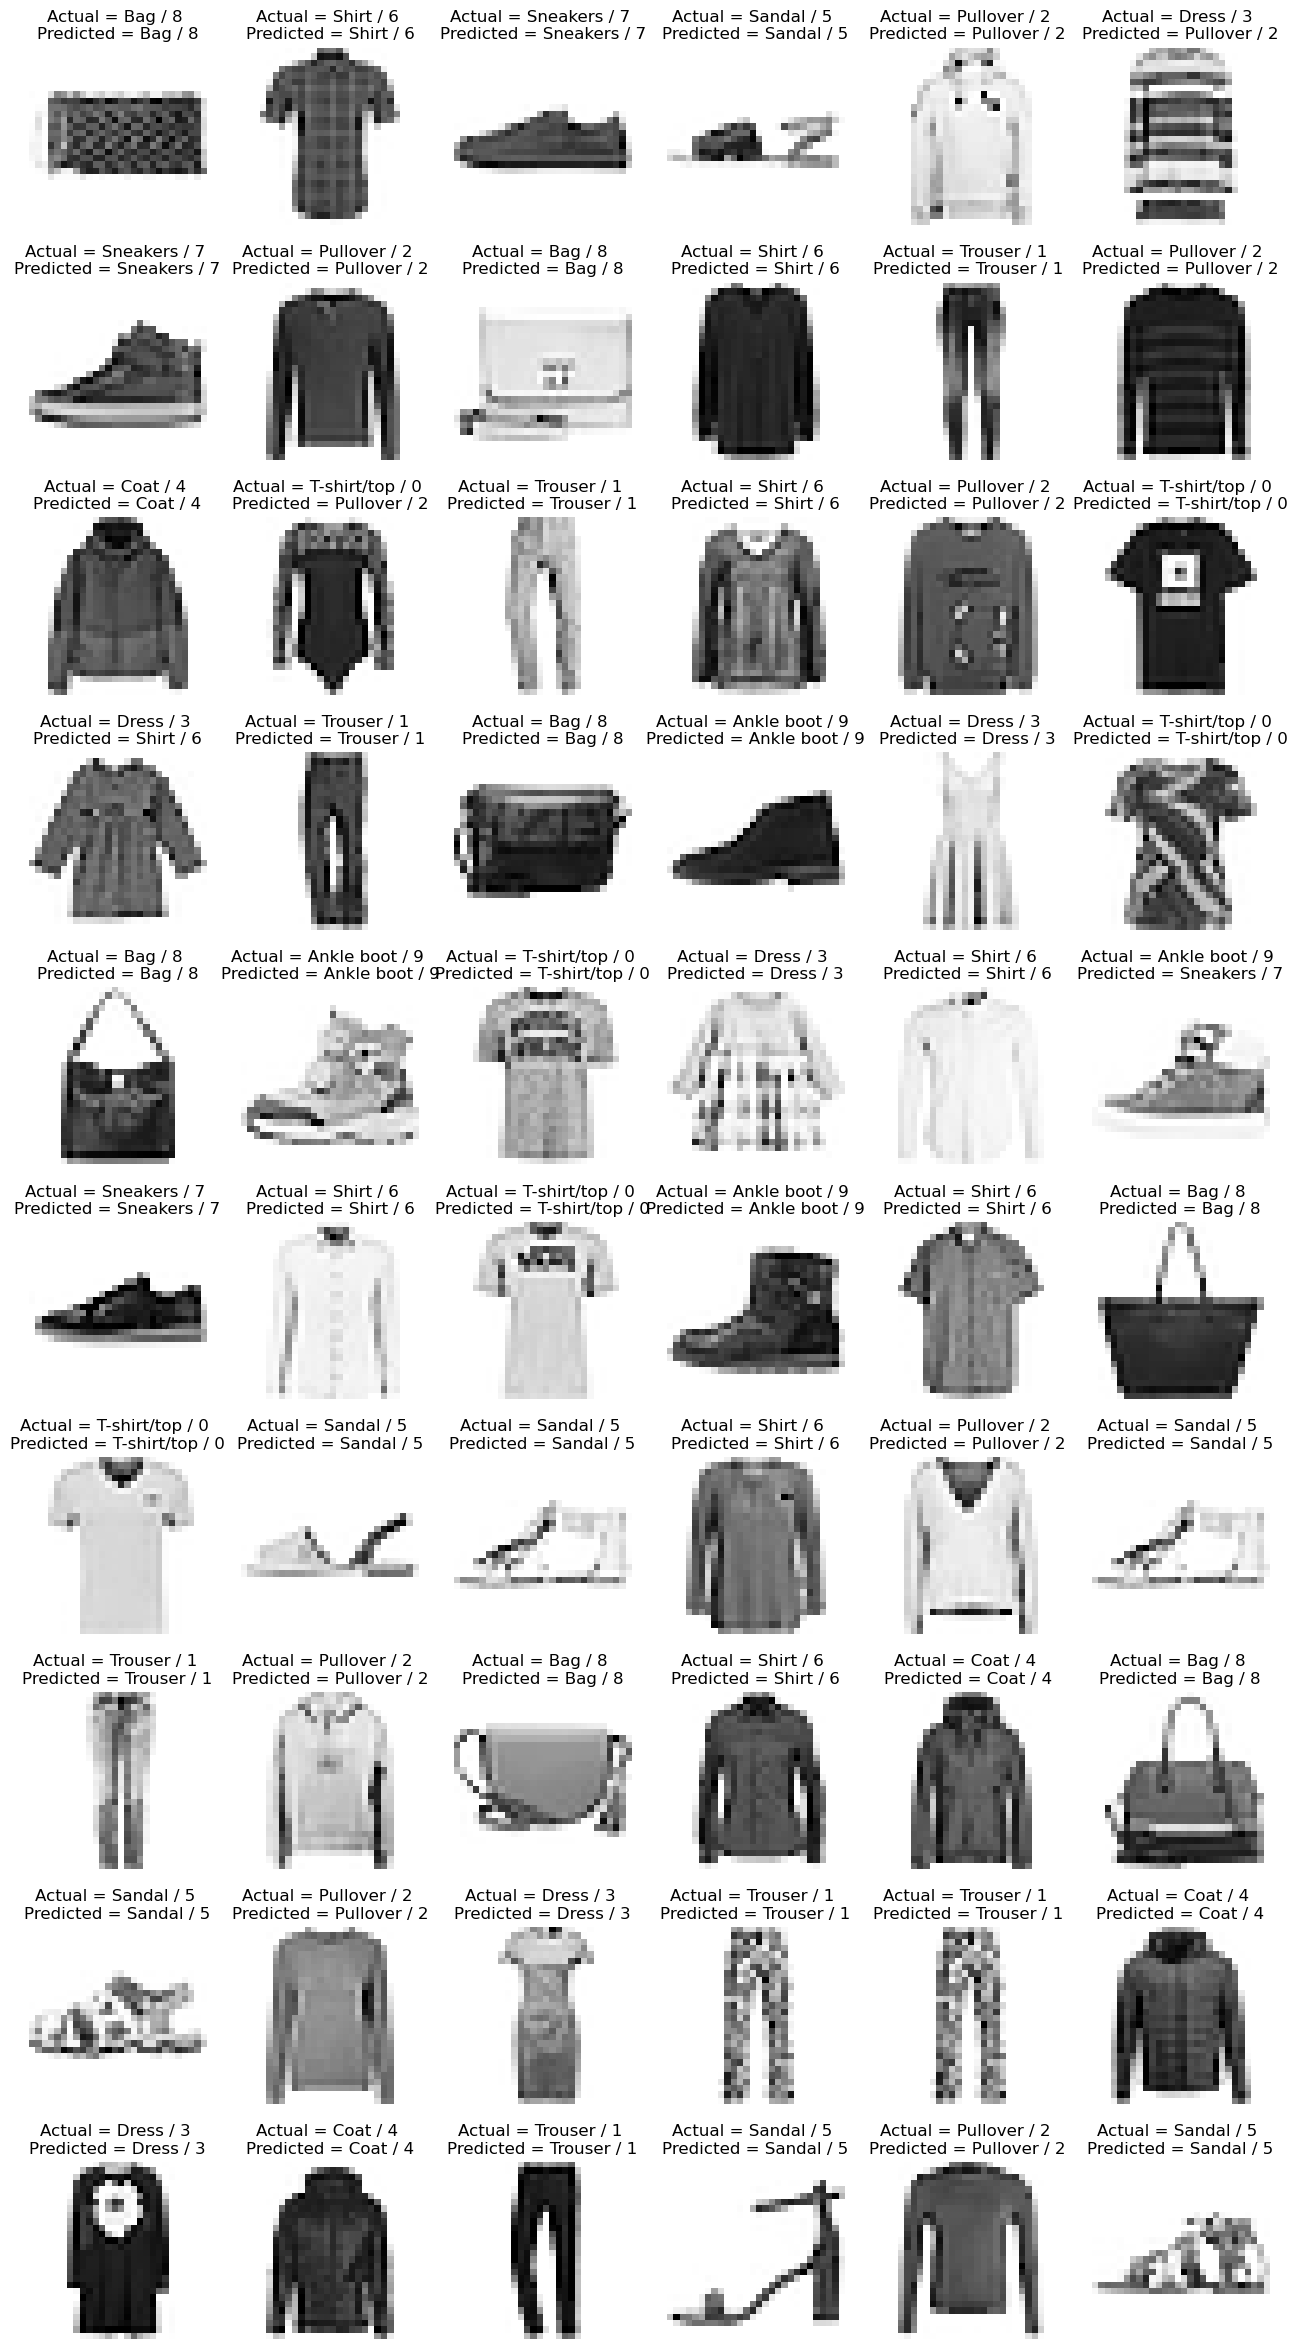

In [224]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

### stats of the confusion matrix 

In [225]:
cr = classification_report(y_test,y_pred_labels,target_names = class_labels)

print(cr)


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.73      0.75      1000
    Sneakers       0.96      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



##  <center>VGG16 model</center >

In [38]:
# count the classes
classes = np.unique(y_train)
num_classes = len(classes)
num_classes

10

In [64]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

*Data manipulation in order to fit in the correct format for VGG16 which is **(48, 48, 3)***

In [65]:
# Convert the images into 3 channels

X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test] * 3)
# X_train.shape,X_test.shape

X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [66]:
# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
#train_x = preprocess_input(x)
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [67]:
# Normalise the data and change data type
  
X_train = X_train/255
X_test = X_test/255
'''
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
'''


"\ntrain_X = train_X.astype('float32')\ntest_X = test_X.astype('float32')\n"

In [68]:
# Converting Labels to one hot encoded format
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [69]:
# Splitting train data as train and validation data
X_train,X_val,train_label,valid_label = train_test_split(X_train,
                                                           y_train_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [70]:
# Check the data size whether it is as per tensorflow and VGG16 requirement
X_train.shape,X_val.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [71]:
# Define the parameters for instanitaing VGG16 model. 
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [72]:
# Preprocessing the input 
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test  = preprocess_input (X_test)

*this^ will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling which is more suitable for **VGG16***

## Creating the model 

In [73]:
#  Create base model of VGG16
conv_base = VGG16(weights="imagenet",
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [74]:
# Feature extraction
train_features = conv_base.predict(np.array(X_train), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(X_train), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(X_val), batch_size=BATCH_SIZE, verbose=1)
#for layer in conv_base.layers:
#    layer.trainable = False

750/750 [==============================] - 115s 153ms/step


In [77]:
# 6.1 Saving the features so that they can be used for future
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, y_test)
np.savez("val_features", val_features, valid_label)

In [78]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (48000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [79]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (48000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [80]:
from keras.models import Model

*Adding normal dense neural network layers to the convbase*

In [116]:
# Building the normal dense neural network after teh feature extraction
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(num_classes, activation='softmax'))

In [117]:
# Compile the model.
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

*Implementing normalization*

In [83]:
# Incorporating reduced learning and early stopping for callback in order to save the best parameters and prevent overitting when the model isn't improving 
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [84]:
# Train the the model
history = model.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks
)

Epoch 1/100
1500/1500 [==============================] - 6s 3ms/step - loss: 1.4883 - acc: 0.4528 - val_loss: 1.1012 - val_acc: 0.6326 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0682 - acc: 0.6106 - val_loss: 0.9389 - val_acc: 0.6512 - lr: 0.0010
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9615 - acc: 0.6507 - val_loss: 0.9700 - val_acc: 0.6462 - lr: 0.0010
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9071 - acc: 0.6690 - val_loss: 0.8727 - val_acc: 0.6812 - lr: 0.0010
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8775 - acc: 0.6794 - val_loss: 0.9285 - val_acc: 0.6557 - lr: 0.0010
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8598 - acc: 0.6873 - val_loss: 0.8340 - val_acc: 0.6919 - lr: 0.0010
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8389 - acc: 0.6930 - val_loss: 0.

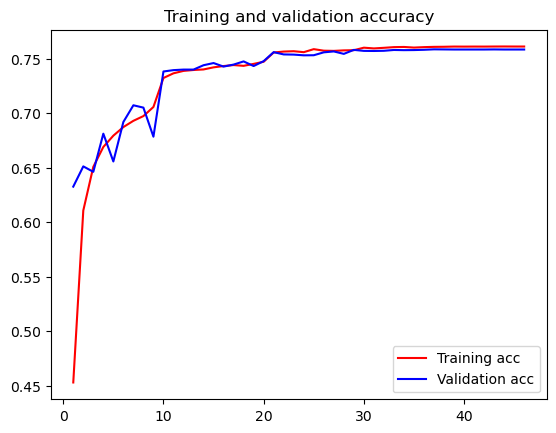

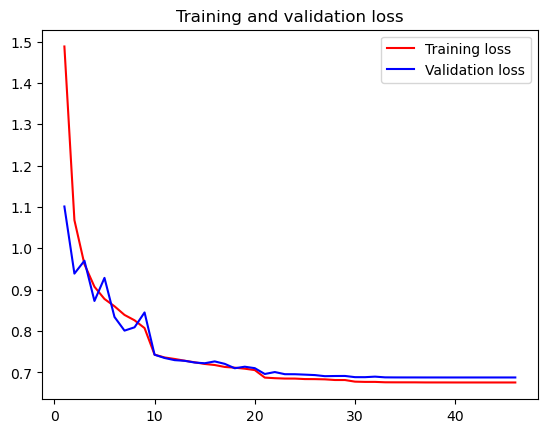

In [85]:
# plot the loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## <center> **Comparison between the pretrained** *VGG16* **model and** *Abdul*'s **model (My model)** </center>
---

In [202]:
# stats of the vgg16 

vval_acc = val_acc[len(val_acc)-1] * 100
vacc = acc[len(acc)-1] * 100
vval_loss = val_loss[len(val_loss)-1] * 100
vloss = loss * 100


In [217]:
# comparison of stats 
print("VGG16 validation dataset accuracy : {:0.3f}". format(vval_acc) , "%", 
      "\nMy model's validation dataset accuracy : {:0.3f}". format(my_val_acc), "%")
print("VGG16 accuracy : {:0.3f}". format(vacc), "%", 
      "\nMy model's accuracy : {:0.3f}". format(my_acc), "%")
print("VGG16 validation dataset loss : {:0.3f}". format(vval_loss), "%",
      "\nMy model's validation dataset loss : {:0.3f}". format(my_val_loss), "%")
print("VGG16 loss : {:0.3f}". format(vloss), "%",
      "\nMy model's loss : {:0.3f}". format(my_loss), "%")

VGG16 validation dataset accuracy : 75.842 % 
My model's validation dataset accuracy : 91.642 %
VGG16 accuracy : 76.117 % 
My model's accuracy : 96.881 %
VGG16 validation dataset loss : 68.764 % 
My model's validation dataset loss : 33.630 %
VGG16 loss : 67.552 % 
My model's loss : 8.833 %


<ins>As we can tell my model has supassed the VGG16 model in all of :</ins>
* Accuracy
* Validation Accuracy
* Loss
* Validation Loss

## **Comparison of network shapes**

In [112]:
conv_base.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 64)        

## <center> **Conclusion** </center>
---

<heading>Not only that my model surpasses in performance and effectiveness, my model also has number of total and trainable parameters = **289, 610** while the VGG16 model has **14, 714, 688**</heading>
<p>this means that the VGG16 model's parameters size is slightly more than 50 times bigger than my model's! </p>
<p>Yet still lost in comparison of stats and less accurate </p>
<p>And due to this large number of trainable parameters this concludes that the computational time for the VGG16 model is far more than my model yet far less effective </p>
